# LOAN ELIGIBILITY PREDICTION


In [ ]:
!pip install missingno
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

loan_train = pd.read_csv(r"C:\Users\s eshwar\OneDrive\Documents\loan-train.csv")
loan_test = pd.read_csv(r"C:\Users\s eshwar\OneDrive\Documents\loan-test.csv")

print("Rows: ", len(loan_train))
print("Columns: ", len(loan_train.columns))
print("Shape : ", loan_train.shape)

loan_train_columns = loan_train.columns

def explore_object_type(df, feature_name):
    if df[feature_name].dtype == 'object':
        print(df[feature_name].value_counts())

for featureName in loan_train_columns:
    if loan_train[featureName].dtype == 'object':
        print('\n"' + str(featureName) + '\'s" Values with count are :')
        explore_object_type(loan_train, str(featureName))

Rows:  614
Columns:  13
Shape :  (614, 13)

"Loan_ID's" Values with count are :
Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

"Gender's" Values with count are :
Gender
Male      489
Female    112
Name: count, dtype: int64

"Married's" Values with count are :
Married
Yes    398
No     213
Name: count, dtype: int64

"Dependents's" Values with count are :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

"Education's" Values with count are :
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

"Self_Employed's" Values with count are :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64

"Property_Area's" Values with count are :
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

"Loan_Status's" Values with count are :
Loan_Status
Y    

<Axes: >

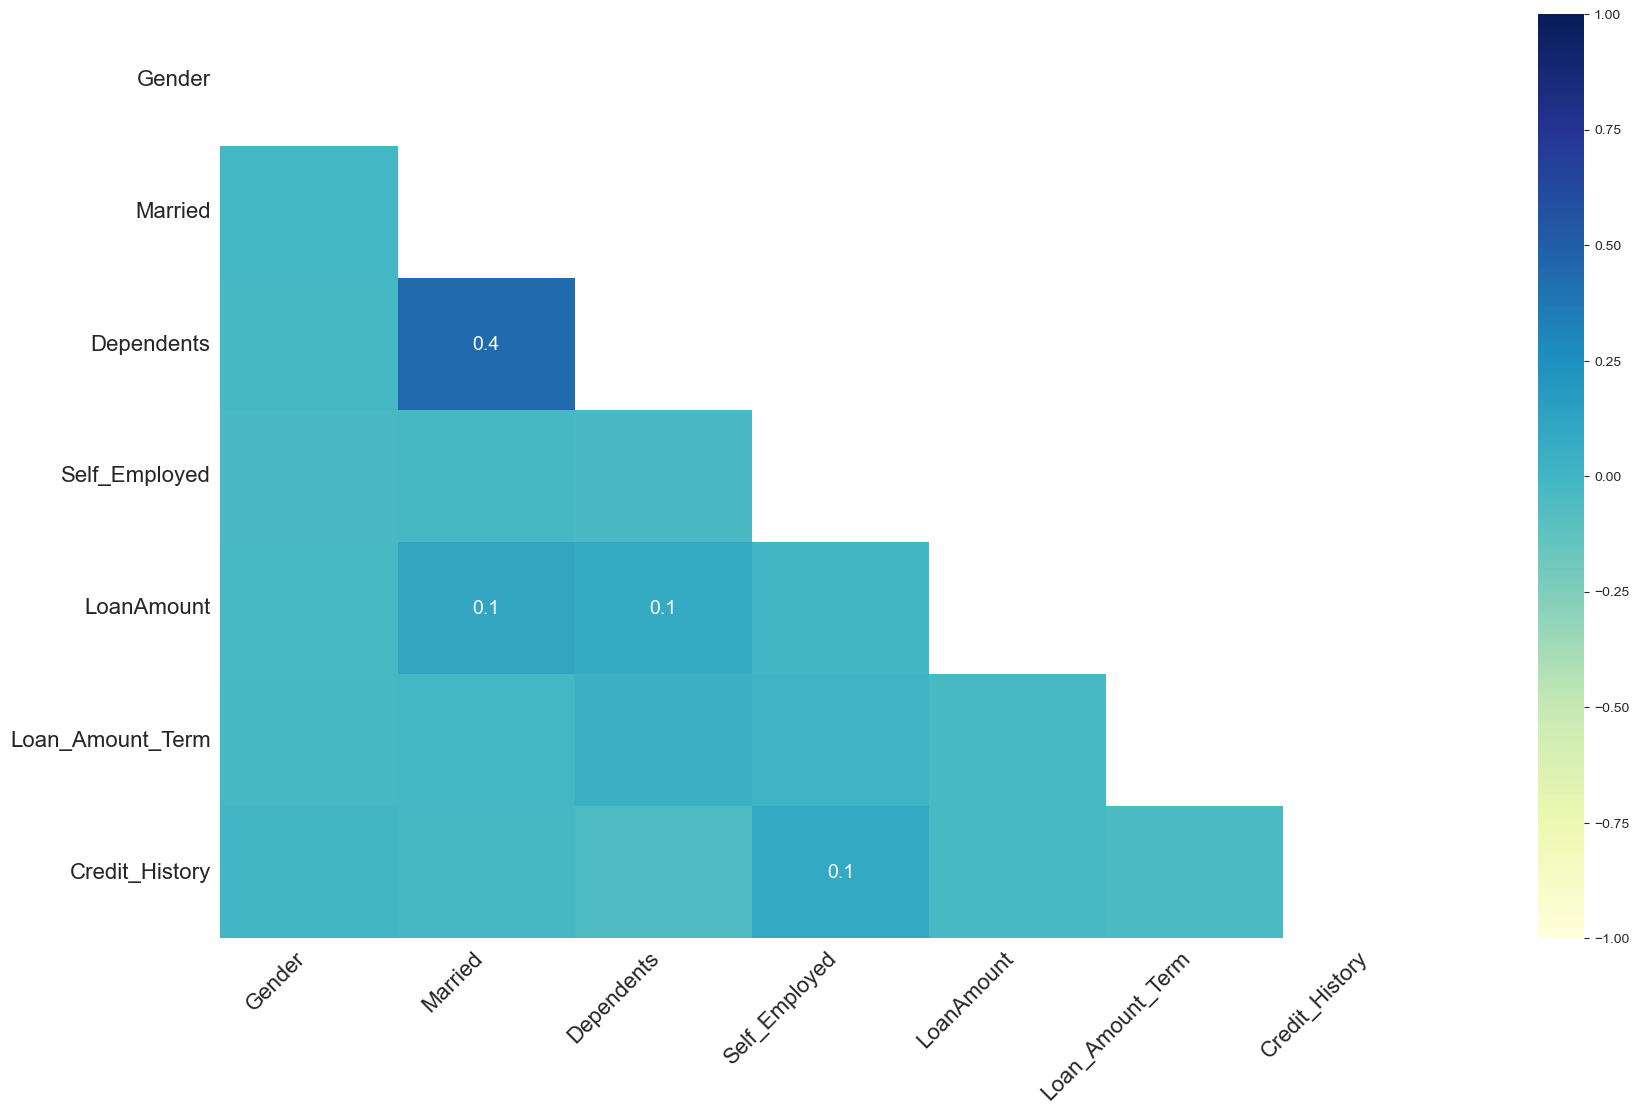

In [ ]:
import missingno as msno

loan_train.isna().sum()
msno.heatmap(loan_train, cmap='YlGnBu')

<Axes: >

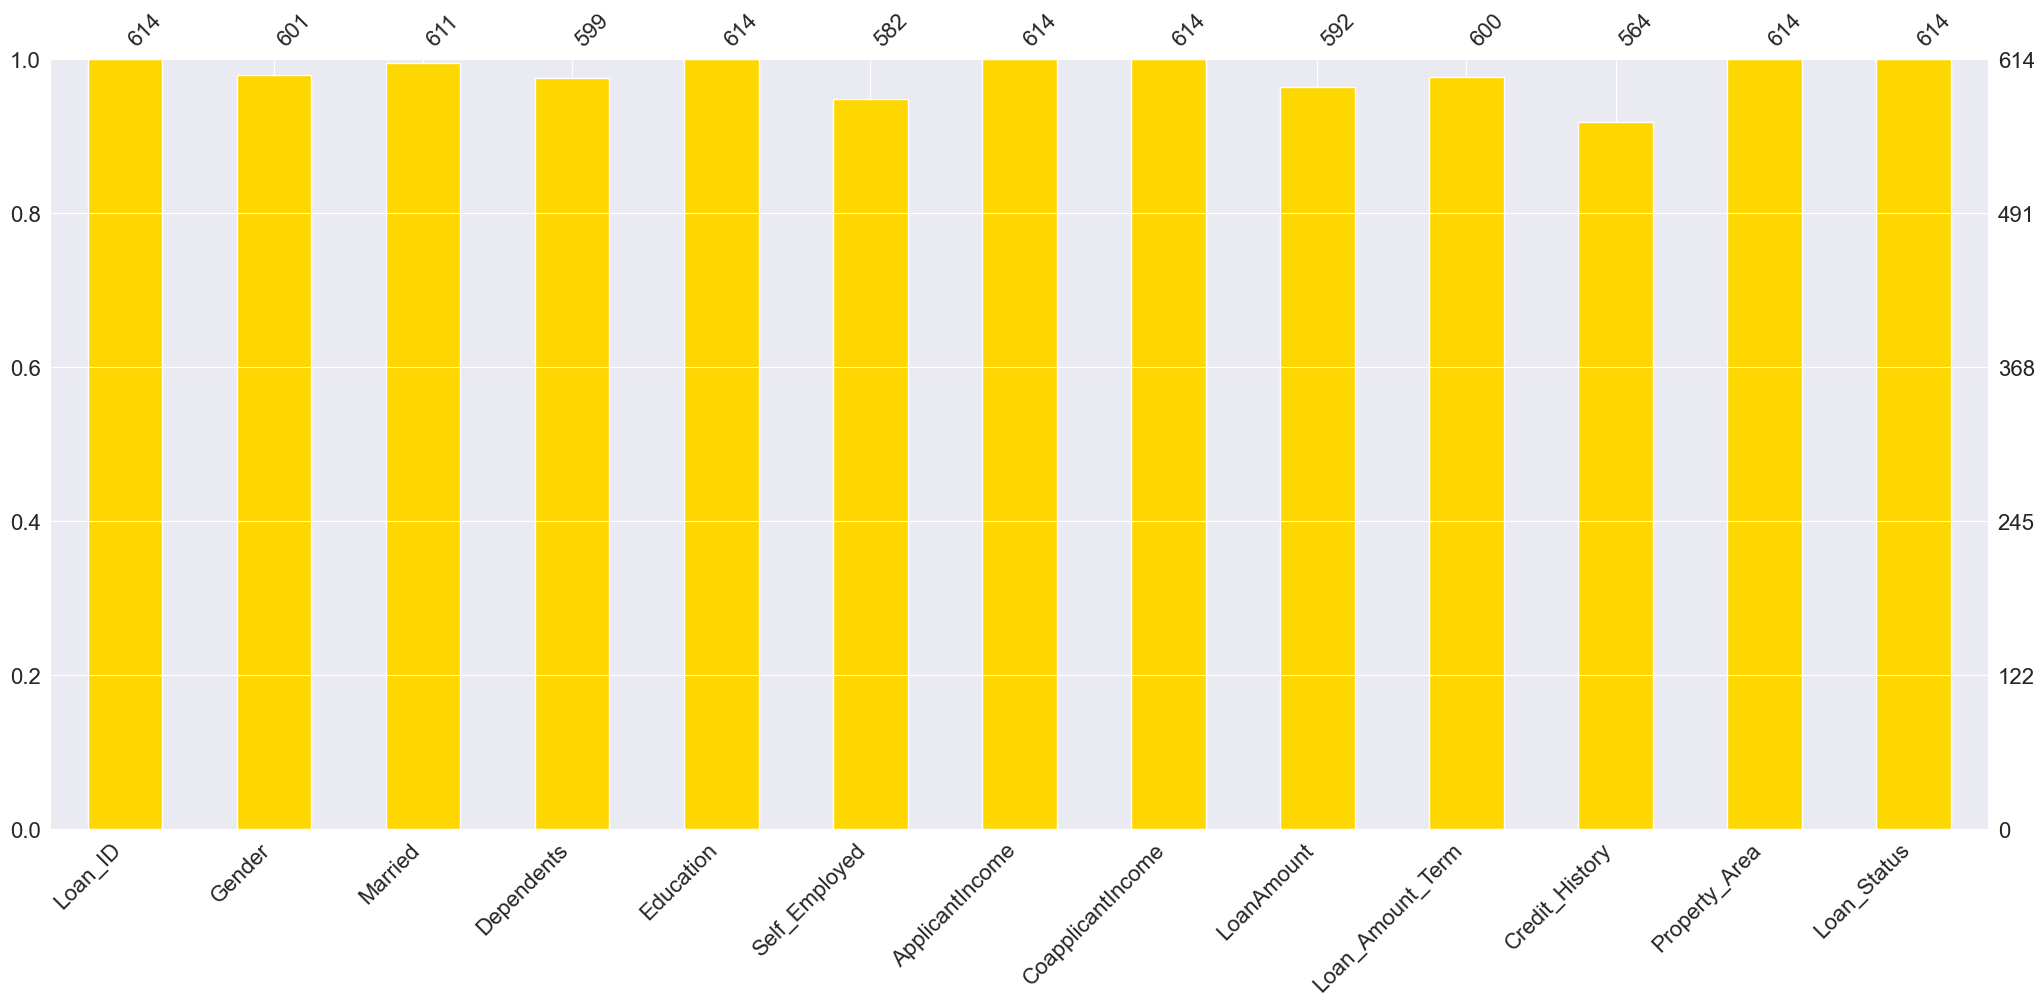

In [ ]:
msno.bar(loan_train, color="gold")

<Axes: >

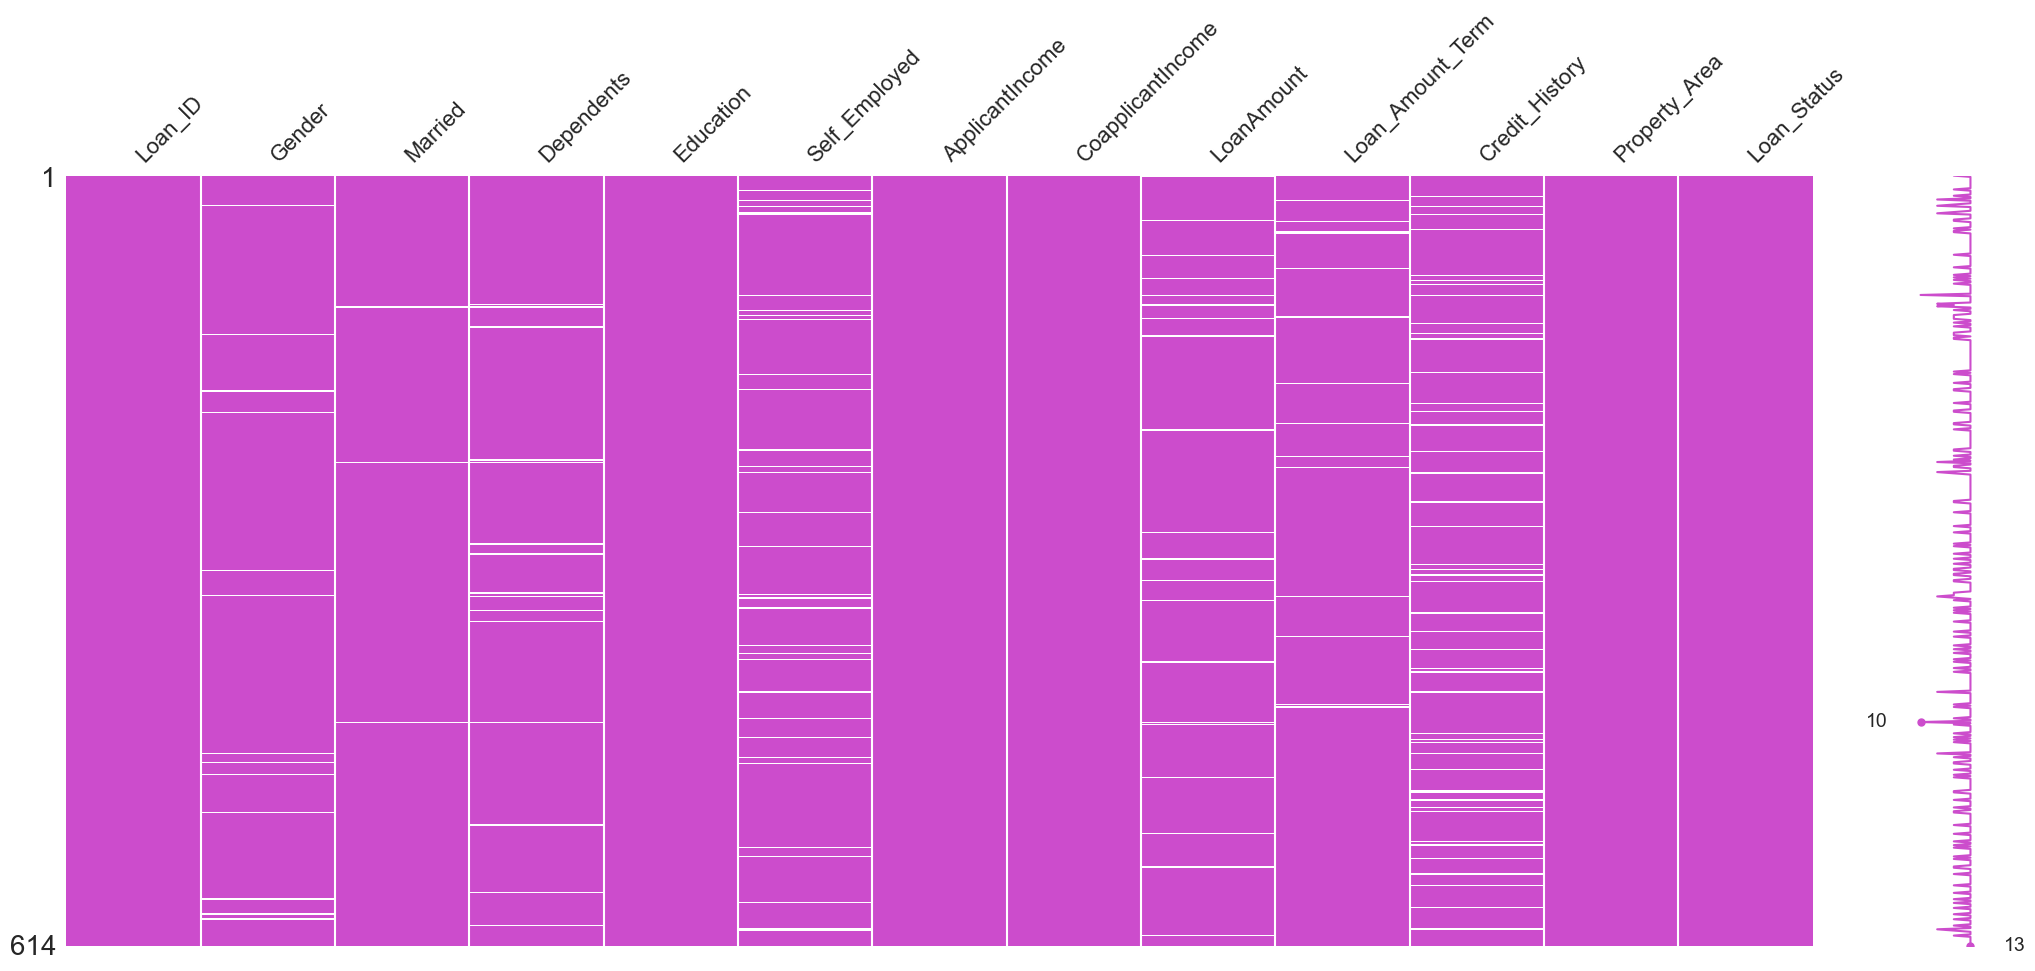

In [ ]:
msno.matrix(loan_train, color=(0.8, 0.3, 0.8))

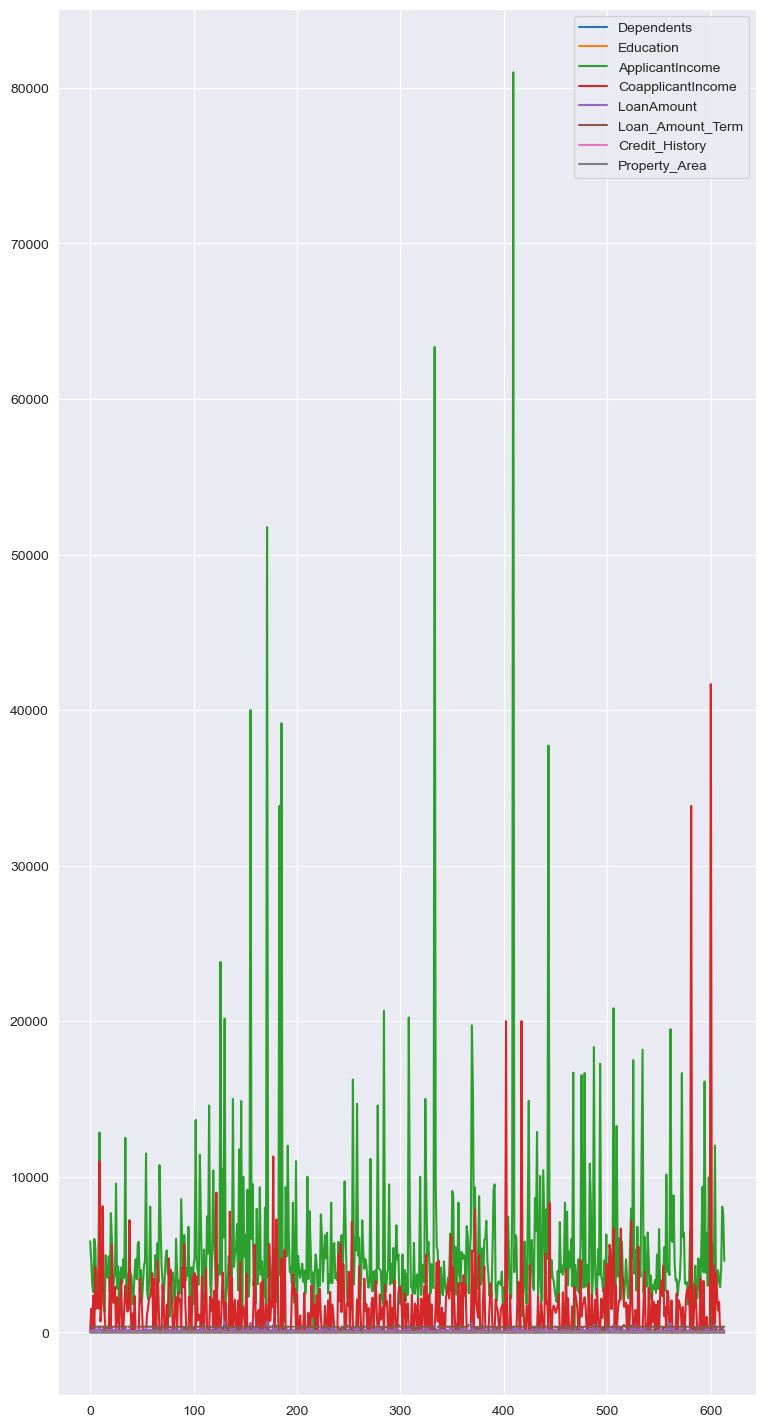

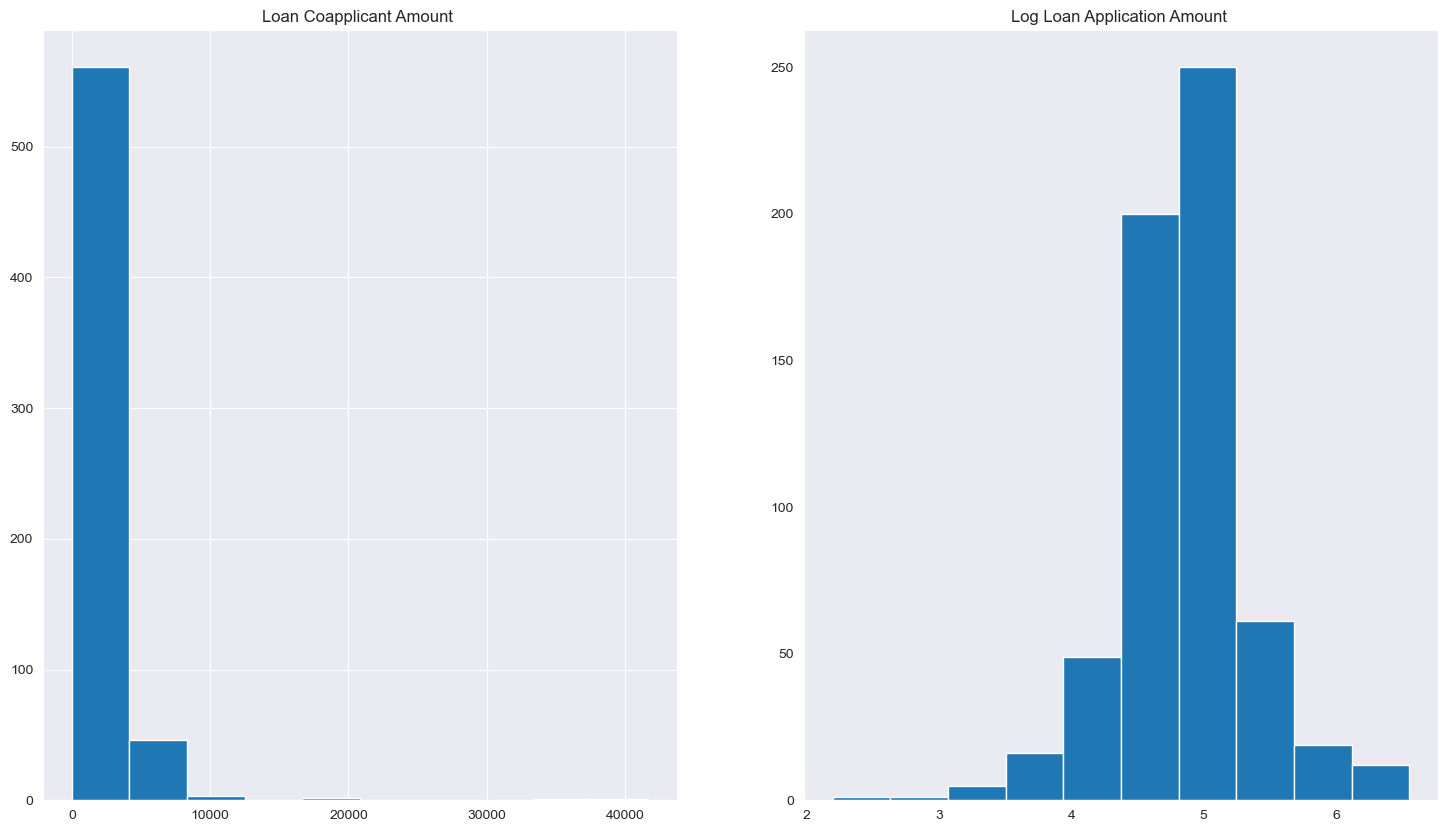

In [ ]:
loan_train['Credit_History'] = loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0])
loan_test['Credit_History'] = loan_test['msno.matrix(loan_train, color=(0.2, 0.4, 0.6))Credit_History'].fillna(loan_test['Credit_History'].mode()[0])

loan_train['LoanAmount'] = loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean())
loan_test['LoanAmount'] = loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean())


feature_col = ['Property_Area', 'Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

sns.set_style('darkgrid')

loan_train.plot(figsize=(9, 18))
plt.show()

plt.figure(figsize=(18, 10))
plt.subplot(1, 2, 1)
loan_train['CoapplicantIncome'].hist(bins=10)
plt.title("Loan Coapplicant Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")
plt.show()

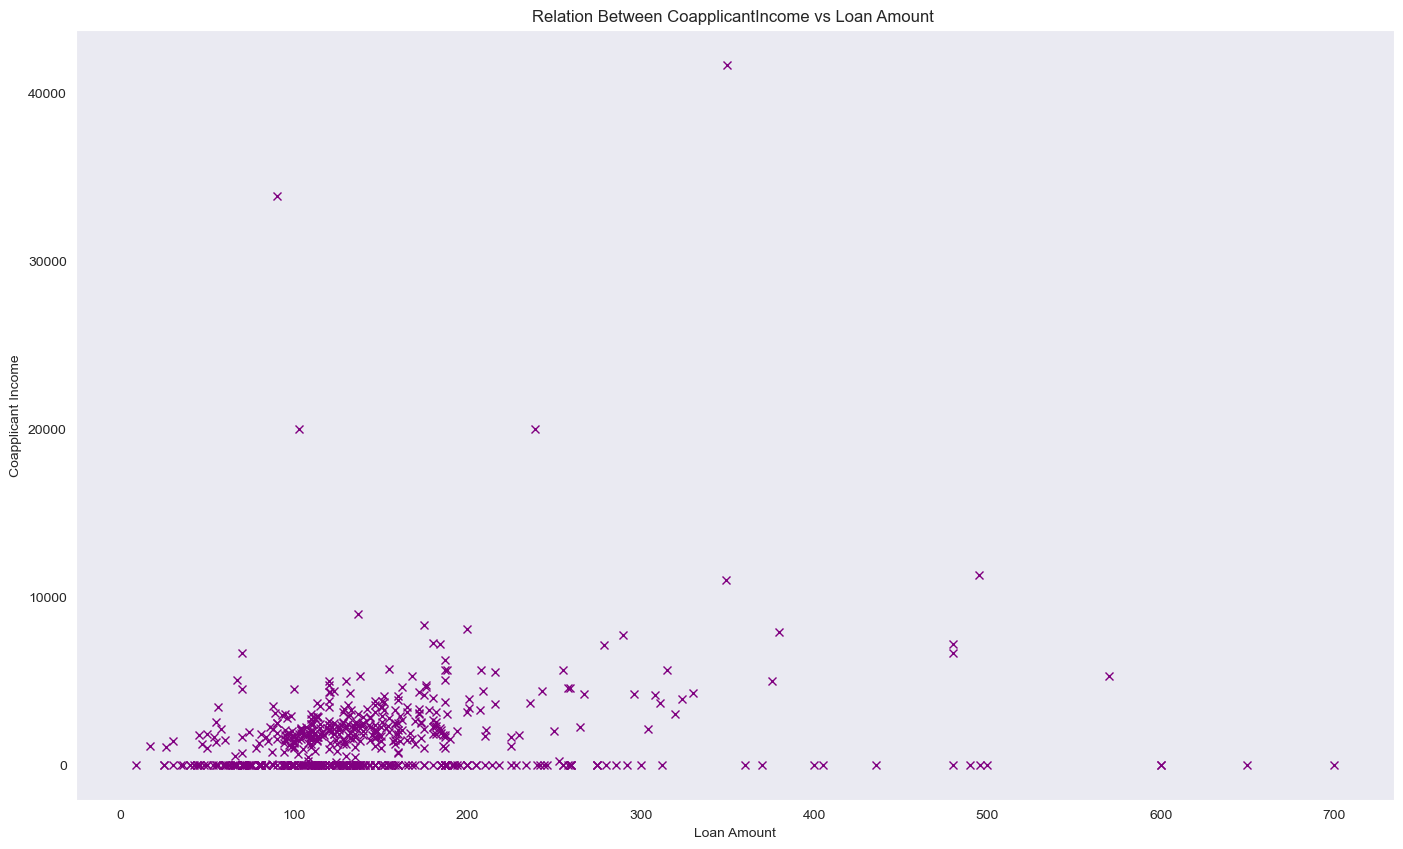

In [ ]:
plt.figure(figsize=(17, 10))
plt.title("Relation Between CoapplicantIncome vs Loan Amount ")
plt.grid()
plt.plot(loan_train['LoanAmount'], loan_train['CoapplicantIncome'], color='purple', marker='x', linestyle=' ')
plt.xlabel("Loan Amount")
plt.ylabel("Coapplicant Income")
plt.show()

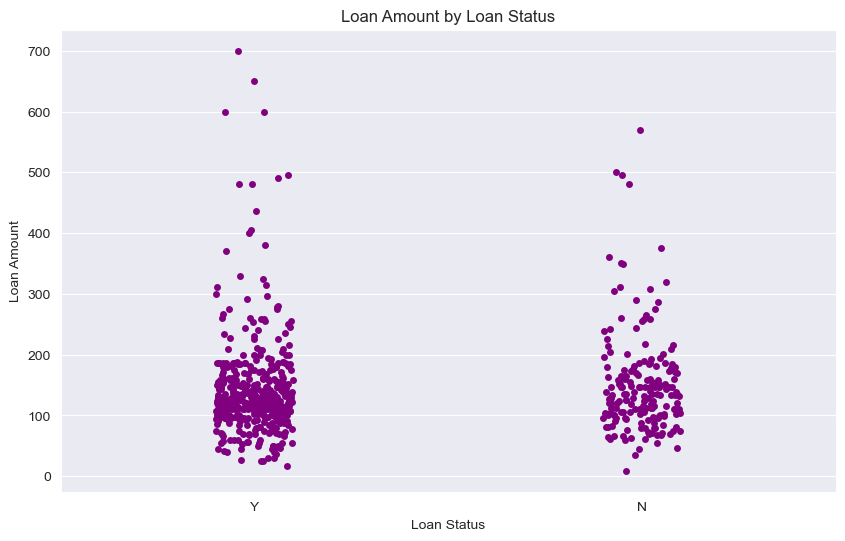

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

plt.figure(figsize=(10, 6))
sns.stripplot(x='Loan_Status', y='LoanAmount', data=loan_train, jitter=True,color='purple')
plt.title("Loan Amount by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Loan Amount")
plt.show()